# Kaggle Facial Keypoint Detection

# Ideas

### Pretraining
- data augmentation
- normalisation


### Model
- make a basic CNN model
- Transfer learning from a pretrained model like VGG-19 or RESNET
- More complicated systems
  - Vision transformers
  - 

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df = df.dropna()

len(df)

2140

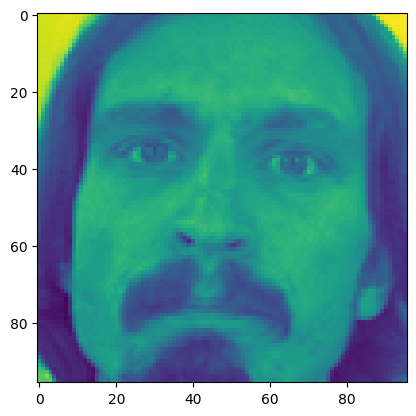

In [4]:
im = np.array(df['Image'][0].split(), dtype=np.int32).reshape(96,-1)
plt.imshow(im)


In [5]:
X, y = [], []

In [6]:
for i in df['Image']:
    X.append(i.split(' '))

In [7]:
y = torch.tensor(df.drop('Image', axis=1).values)
y.shape

torch.Size([2140, 30])

In [8]:
y

tensor([[66.0336, 39.0023, 30.2270,  ..., 72.9355, 43.1307, 84.4858],
        [64.3329, 34.9701, 29.9493,  ..., 70.2666, 45.4679, 85.4802],
        [65.0571, 34.9096, 30.9038,  ..., 70.1918, 47.2749, 78.6594],
        ...,
        [68.4309, 38.6520, 28.8959,  ..., 79.0431, 47.1767, 89.5445],
        [64.1522, 30.6916, 27.0009,  ..., 79.3014, 58.6111, 80.3555],
        [66.6838, 34.4834, 30.7845,  ..., 75.9636, 52.9234, 82.6611]],
       dtype=torch.float64)

In [9]:
X = [list(map(int, x)) for x in X]
X = torch.tensor(X)
X = (X/255.).view(-1, 1, 96,96)
X.shape

torch.Size([2140, 1, 96, 96])

In [10]:
class FaceDataset(Dataset):
    def __init__(self):
        df = pd.read_csv('data/train.csv')
        df = df.dropna()
        X = []
        for i in df['Image']:
            X.append(i.split(' '))
        X = [list(map(int, x)) for x in X]
        X = torch.tensor(X)
        self.X = (X/255.).view(-1, 1, 96,96)
        df.drop('Image', axis=1 )
        self.y = torch.tensor(df.drop('Image', axis=1).values)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [11]:
X.shape, y.shape

(torch.Size([2140, 1, 96, 96]), torch.Size([2140, 30]))

In [12]:
# fgfgd

NameError: name 'fgfgd' is not defined

In [ ]:
dataset = FaceDataset()
dataloader = DataLoader(dataset=dataset, batch_size=256, shuffle=True, num_workers=0)

# Model

In [11]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 21 * 21, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 30)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 21 * 21)
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x)) 
        x = self.fc3(x)
        return x   

# Training

In [31]:
num_epochs = 100
lr = 1e-4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [32]:
model = CNN().to(device)
loss_category = nn.MSELoss()
optimiser = torch.optim.AdamW(model.parameters(), lr=lr)
history = []

In [ ]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # print(inputs.shape)
        # print(labels.shape)
        # print(labels)
        inputs = inputs.to(device)
        labels = labels.to(device)

        y_pred = model(inputs)

        loss = loss_category(y_pred.float(), labels.float())
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

    print(f'Epoch: {epoch} Loss: {loss}')
    history.append(loss.cpu().detach().numpy())

    if epoch%100 == 0:
        # validation split
        

Epoch: 0 Loss: 12.187460899353027
Epoch: 1 Loss: 13.091404914855957
Epoch: 2 Loss: 11.833646774291992
Epoch: 3 Loss: 12.01024055480957
Epoch: 4 Loss: 10.887653350830078
Epoch: 5 Loss: 10.897632598876953
Epoch: 6 Loss: 13.441262245178223
Epoch: 7 Loss: 12.391220092773438
Epoch: 8 Loss: 12.328679084777832
Epoch: 9 Loss: 10.283173561096191
Epoch: 10 Loss: 10.08724308013916
Epoch: 11 Loss: 10.713618278503418
Epoch: 12 Loss: 10.676677703857422
Epoch: 13 Loss: 11.702131271362305
Epoch: 14 Loss: 11.66700553894043
Epoch: 15 Loss: 13.003185272216797
Epoch: 16 Loss: 12.661849021911621
Epoch: 17 Loss: 12.70434284210205
Epoch: 18 Loss: 12.941423416137695
Epoch: 19 Loss: 12.528020858764648
Epoch: 20 Loss: 12.804557800292969
Epoch: 21 Loss: 14.044275283813477
Epoch: 22 Loss: 11.907880783081055
Epoch: 23 Loss: 12.741089820861816
Epoch: 24 Loss: 10.780287742614746
Epoch: 25 Loss: 12.708527565002441
Epoch: 26 Loss: 11.339384078979492
Epoch: 27 Loss: 11.78475284576416
Epoch: 28 Loss: 11.544842720031738


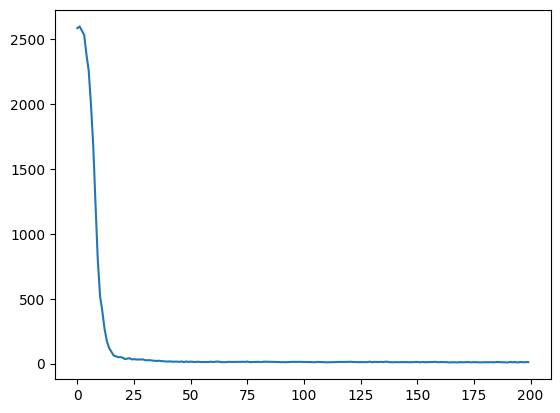

In [36]:
plt.plot(history)

# TODO

- Do proper init